## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
# import os
import keras
# import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp_BF_act(input_shape, output_units = 10,
                     num_neurons= [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
#     x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units = n_units, activation = "relu",
                                   name = "hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units = n_units, activation = "relu",
                                   name = "hidden_layer"+str(i+1))(x)
        
        out = keras.layers.Dense(units = output_units, activation="softmax",
                                 name = "output_layer")(x)
        
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [6]:
def build_mlp_AF_ipt(input_shape, output_units = 10, num_neurons= [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units = n_units, activation = "relu",
                                name = "hidden_layer"+str(i+1))(x)
        
    out = keras.layers.Dense(units = output_units, activation="softmax",
                                 name = "output_layer")(x)
        
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [7]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = [2, 16, 32, 128, 256]
Momentum = 0.95
model0 = build_mlp_AF_ipt(input_shape=x_train.shape[1:])
model1 = build_mlp_BF_act(input_shape=x_train.shape[1:])
Build = [model0, model1]

In [9]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, md in enumerate(Build):
    for j, bs in enumerate(Batch_size):
        md.summary()
        optimizer = keras.optimizers.SGD(lr = Learning_rate, nesterov = True,
                                         momentum = Momentum)
        md.compile(loss = "categorical_crossentropy", metrics = ["accuracy"],
                   optimizer = optimizer)
        md.fit(x_train, y_train, 
               epochs = Epochs,
               batch_size = bs,
               validation_data = (x_test, y_test),
               shuffle = True)
        # Collect results
        train_loss = md.history.history["loss"]
        valid_loss = md.history.history["val_loss"]
        train_acc = md.history.history["accuracy"]
        valid_acc = md.history.history["val_accuracy"]
        
        exp_name_tag = "exp-%s-%s" %(str(md), str(bs))
        results[exp_name_tag] = {"train-loss": train_loss,
                                 "valid-loss": valid_loss,
                                 "train-acc": train_acc,
                                 "valid-acc": valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
________________________________________

25000/25000 [==============================] - 151s 6ms/step - loss: 1.8572 - accuracy: 0.3452 - val_loss: 1.8953 - val_accuracy: 0.4262
Epoch 49/50
25000/25000 [==============================] - 151s 6ms/step - loss: 1.8517 - accuracy: 0.3482 - val_loss: 1.8066 - val_accuracy: 0.4425
Epoch 50/50
25000/25000 [==============================] - 151s 6ms/step - loss: 1.8549 - accuracy: 0.3466 - val_loss: 2.0332 - val_accuracy: 0.4382
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (

3125/3125 [==============================] - 20s 6ms/step - loss: 0.6593 - accuracy: 0.7630 - val_loss: 1.6556 - val_accuracy: 0.5309
Epoch 47/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6483 - accuracy: 0.7707 - val_loss: 1.6827 - val_accuracy: 0.5334
Epoch 48/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6496 - accuracy: 0.7678 - val_loss: 1.6616 - val_accuracy: 0.5345
Epoch 49/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6331 - accuracy: 0.7758 - val_loss: 1.7058 - val_accuracy: 0.5353
Epoch 50/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6276 - accuracy: 0.7754 - val_loss: 1.7065 - val_accuracy: 0.5354
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________________________________________________

1563/1563 [==============================] - 12s 8ms/step - loss: 0.2191 - accuracy: 0.9230 - val_loss: 2.8283 - val_accuracy: 0.5174
Epoch 45/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2207 - accuracy: 0.9218 - val_loss: 2.8618 - val_accuracy: 0.5175
Epoch 46/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2191 - accuracy: 0.9239 - val_loss: 2.8867 - val_accuracy: 0.5245
Epoch 47/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2161 - accuracy: 0.9244 - val_loss: 2.8755 - val_accuracy: 0.5228
Epoch 48/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2161 - accuracy: 0.9246 - val_loss: 2.8748 - val_accuracy: 0.5198
Epoch 49/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2087 - accuracy: 0.9259 - val_loss: 2.9043 - val_accuracy: 0.5210
Epoch 50/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2055 - accuracy: 0.9288 - val_loss: 2.9527 - val_accurac

Epoch 43/50
391/391 [==============================] - 5s 14ms/step - loss: 0.0314 - accuracy: 0.9921 - val_loss: 3.9587 - val_accuracy: 0.5233
Epoch 44/50
391/391 [==============================] - 5s 13ms/step - loss: 0.0314 - accuracy: 0.9920 - val_loss: 3.9761 - val_accuracy: 0.5248
Epoch 45/50
391/391 [==============================] - 5s 13ms/step - loss: 0.0305 - accuracy: 0.9924 - val_loss: 3.9896 - val_accuracy: 0.5255
Epoch 46/50
391/391 [==============================] - 5s 13ms/step - loss: 0.0313 - accuracy: 0.9917 - val_loss: 4.0099 - val_accuracy: 0.5219
Epoch 47/50
391/391 [==============================] - 5s 13ms/step - loss: 0.0295 - accuracy: 0.9927 - val_loss: 4.0227 - val_accuracy: 0.5218
Epoch 48/50
391/391 [==============================] - 5s 14ms/step - loss: 0.0295 - accuracy: 0.9926 - val_loss: 4.0316 - val_accuracy: 0.5225
Epoch 49/50
391/391 [==============================] - 5s 13ms/step - loss: 0.0301 - accuracy: 0.9920 - val_loss: 4.0383 - val_accuracy:

Epoch 42/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0134 - accuracy: 0.9976 - val_loss: 4.4021 - val_accuracy: 0.5225
Epoch 43/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0134 - accuracy: 0.9976 - val_loss: 4.4103 - val_accuracy: 0.5237
Epoch 44/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 4.4210 - val_accuracy: 0.5236
Epoch 45/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0130 - accuracy: 0.9976 - val_loss: 4.4269 - val_accuracy: 0.5234
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0129 - accuracy: 0.9977 - val_loss: 4.4338 - val_accuracy: 0.5237
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 0.0126 - accuracy: 0.9980 - val_loss: 4.4397 - val_accuracy: 0.5240
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 0.0126 - accuracy: 0.9978 - val_loss: 4.4477 - val_accuracy:

25000/25000 [==============================] - 152s 6ms/step - loss: 2.1766 - accuracy: 0.2035 - val_loss: 295.3643 - val_accuracy: 0.1823
Epoch 38/50
25000/25000 [==============================] - 150s 6ms/step - loss: 2.1821 - accuracy: 0.2027 - val_loss: 788.4325 - val_accuracy: 0.1522
Epoch 39/50
25000/25000 [==============================] - 150s 6ms/step - loss: 2.1780 - accuracy: 0.2023 - val_loss: 82.8071 - val_accuracy: 0.1932
Epoch 40/50
25000/25000 [==============================] - 150s 6ms/step - loss: 2.1821 - accuracy: 0.2021 - val_loss: 262.0308 - val_accuracy: 0.1834
Epoch 41/50
25000/25000 [==============================] - 150s 6ms/step - loss: 2.1866 - accuracy: 0.1988 - val_loss: 207.5519 - val_accuracy: 0.1752
Epoch 42/50
25000/25000 [==============================] - 150s 6ms/step - loss: 2.1868 - accuracy: 0.1984 - val_loss: 116.8815 - val_accuracy: 0.1873
Epoch 43/50
25000/25000 [==============================] - 150s 6ms/step - loss: 2.1894 - accuracy: 0.1991 

3125/3125 [==============================] - 20s 7ms/step - loss: 1.6782 - accuracy: 0.3977 - val_loss: 1.7007 - val_accuracy: 0.4250
Epoch 34/50
3125/3125 [==============================] - 20s 6ms/step - loss: 1.6744 - accuracy: 0.3979 - val_loss: 1.6876 - val_accuracy: 0.4303
Epoch 35/50
3125/3125 [==============================] - 20s 7ms/step - loss: 1.6694 - accuracy: 0.4013 - val_loss: 1.7376 - val_accuracy: 0.4275
Epoch 36/50
3125/3125 [==============================] - 20s 7ms/step - loss: 1.6617 - accuracy: 0.4053 - val_loss: 1.7315 - val_accuracy: 0.4381
Epoch 37/50
3125/3125 [==============================] - 20s 7ms/step - loss: 1.6606 - accuracy: 0.4073 - val_loss: 1.7111 - val_accuracy: 0.4342
Epoch 38/50
3125/3125 [==============================] - 20s 7ms/step - loss: 1.6552 - accuracy: 0.4065 - val_loss: 1.7079 - val_accuracy: 0.4364
Epoch 39/50
3125/3125 [==============================] - 20s 7ms/step - loss: 1.6501 - accuracy: 0.4085 - val_loss: 1.6912 - val_accurac

1563/1563 [==============================] - 13s 8ms/step - loss: 1.4625 - accuracy: 0.4782 - val_loss: 1.5483 - val_accuracy: 0.4724
Epoch 30/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4620 - accuracy: 0.4774 - val_loss: 1.5325 - val_accuracy: 0.4761
Epoch 31/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4604 - accuracy: 0.4766 - val_loss: 1.5399 - val_accuracy: 0.4748
Epoch 32/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4563 - accuracy: 0.4783 - val_loss: 1.5347 - val_accuracy: 0.4719
Epoch 33/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4581 - accuracy: 0.4798 - val_loss: 1.5288 - val_accuracy: 0.4700
Epoch 34/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4511 - accuracy: 0.4809 - val_loss: 1.5342 - val_accuracy: 0.4750
Epoch 35/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4519 - accuracy: 0.4795 - val_loss: 1.5519 - val_accurac

Epoch 26/50
391/391 [==============================] - 5s 13ms/step - loss: 1.3007 - accuracy: 0.5358 - val_loss: 1.4954 - val_accuracy: 0.4812
Epoch 27/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2999 - accuracy: 0.5391 - val_loss: 1.4965 - val_accuracy: 0.4796
Epoch 28/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2970 - accuracy: 0.5373 - val_loss: 1.4950 - val_accuracy: 0.4817
Epoch 29/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2970 - accuracy: 0.5376 - val_loss: 1.4951 - val_accuracy: 0.4832
Epoch 30/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2952 - accuracy: 0.5390 - val_loss: 1.4957 - val_accuracy: 0.4806
Epoch 31/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2969 - accuracy: 0.5380 - val_loss: 1.4931 - val_accuracy: 0.4818
Epoch 32/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2919 - accuracy: 0.5404 - val_loss: 1.4957 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.2395 - accuracy: 0.5603 - val_loss: 1.5053 - val_accuracy: 0.4799
Epoch 24/50
196/196 [==============================] - 4s 20ms/step - loss: 1.2408 - accuracy: 0.5583 - val_loss: 1.5073 - val_accuracy: 0.4794
Epoch 25/50
196/196 [==============================] - 4s 21ms/step - loss: 1.2374 - accuracy: 0.5591 - val_loss: 1.5092 - val_accuracy: 0.4778
Epoch 26/50
196/196 [==============================] - 4s 21ms/step - loss: 1.2377 - accuracy: 0.5588 - val_loss: 1.5078 - val_accuracy: 0.4797
Epoch 27/50
196/196 [==============================] - 4s 21ms/step - loss: 1.2386 - accuracy: 0.5595 - val_loss: 1.5091 - val_accuracy: 0.4776
Epoch 28/50
196/196 [==============================] - 4s 20ms/step - loss: 1.2369 - accuracy: 0.5606 - val_loss: 1.5100 - val_accuracy: 0.4795
Epoch 29/50
196/196 [==============================] - 4s 20ms/step - loss: 1.2365 - accuracy: 0.5593 - val_loss: 1.5114 - val_accuracy: 0.4814
Epoc

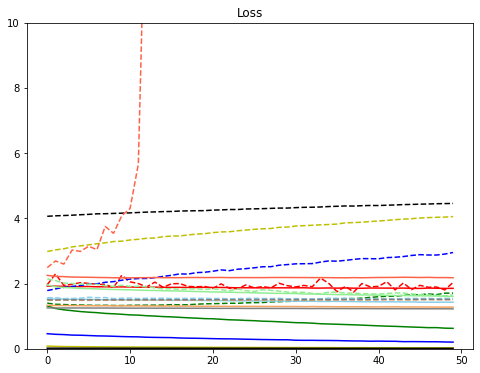

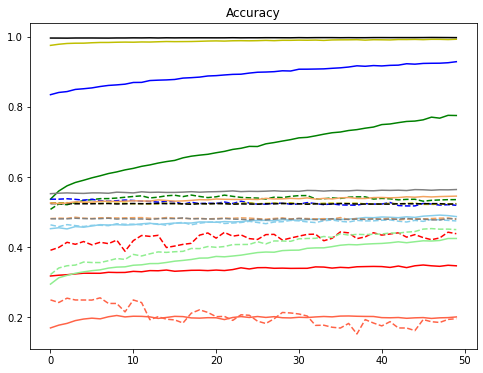

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "k", "tomato", "lightgreen", "skyblue",
             "sandybrown", "gray"]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label = cond, c = color_bar[i])
plt.title("Loss")
plt.ylim([0, 10.])
# plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label = cond, c= color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label = cond, c = color_bar[i])
plt.title("Accuracy")
# plt.legend()
plt.show()